Index(['Wine', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5',
       'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10',
       'Feature11', 'Feature12', 'Feature13'],
      dtype='object')


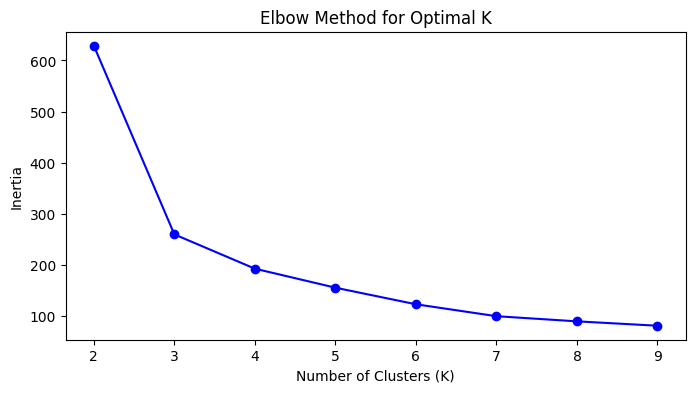

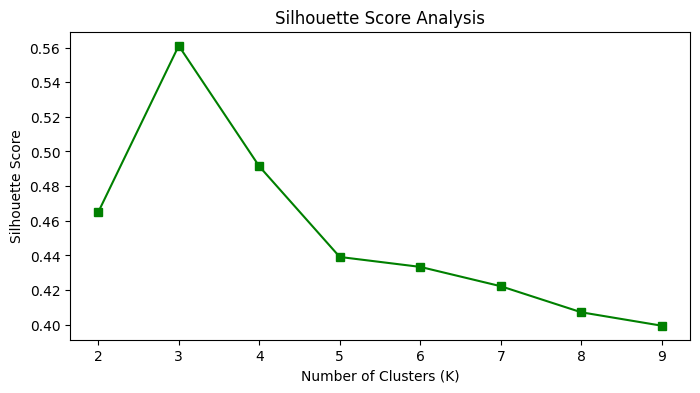

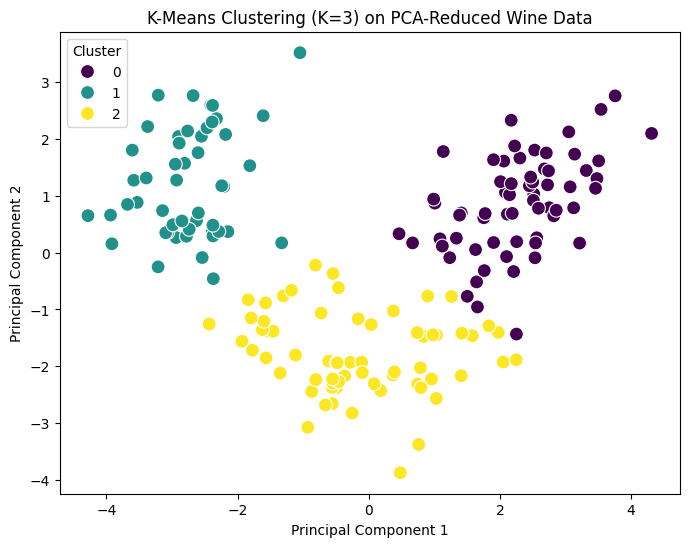

Silhouette Score for K=3: 0.5611


In [45]:
#task 6


#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset

df = pd.read_csv('Wine.csv', header=None)

column_names = ["Wine", "Feature1", "Feature2", "Feature3", "Feature4", "Feature5",
                "Feature6", "Feature7", "Feature8", "Feature9", "Feature10",
                "Feature11", "Feature12", "Feature13"]

df.columns = column_names  # Assign new column names

# Verify column names
print(df.columns)

# Step 2: Preprocess and apply PCA
X = df.drop(columns=["Wine"])  # Assuming "Wine" is the target column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Determine optimal K using Elbow Method
inertia = []
sil_scores = []
K_range = range(2, 10)  # Checking for 2 to 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker="o", linestyle="-", color="blue")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker="s", linestyle="-", color="green")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

# Step 4: Apply K-Means with optimal K (from elbow method, assume K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Step 5: Visualize the clusters
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue=pca_df["Cluster"], palette="viridis", data=pca_df, s=100)
plt.title(f"K-Means Clustering (K={optimal_k}) on PCA-Reduced Wine Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Print the Silhouette Score
print(f"Silhouette Score for K={optimal_k}: {silhouette_score(X_pca, clusters):.4f}")


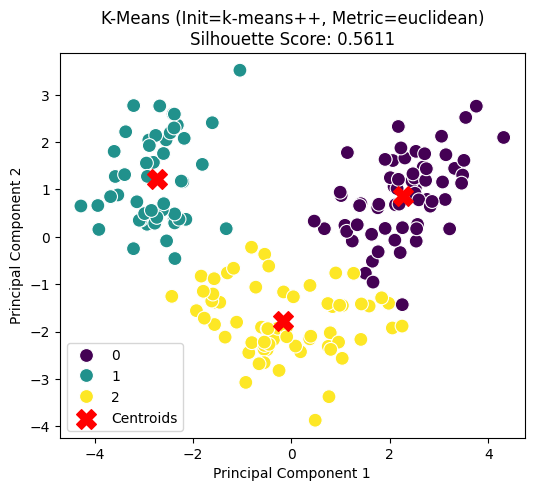

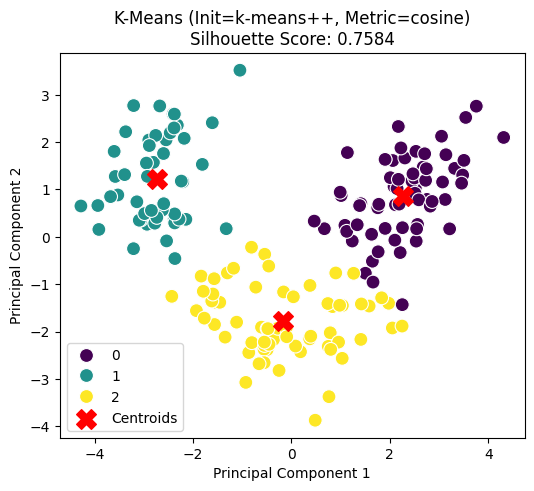

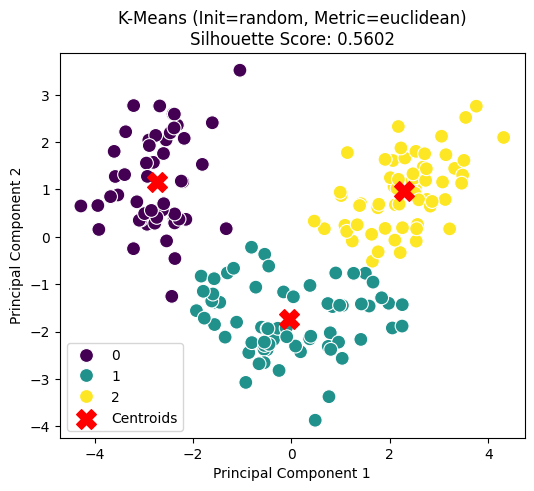

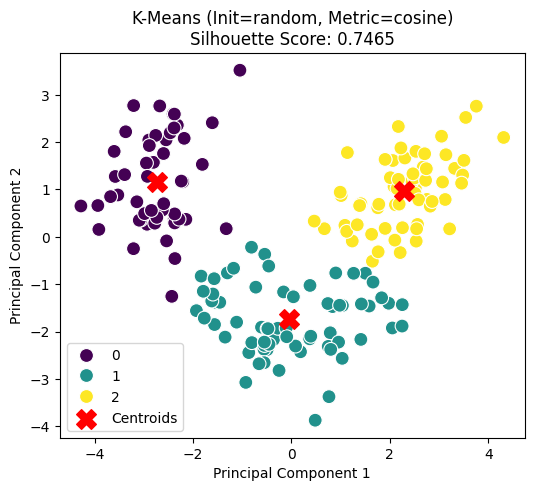

Silhouette Scores for Different K-Means Configurations:
Init=k-means++, Metric=euclidean: 0.5611
Init=k-means++, Metric=cosine: 0.7584
Init=random, Metric=euclidean: 0.5602
Init=random, Metric=cosine: 0.7465


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Load the dataset

df = pd.read_csv('Wine.csv', header=None)

column_names = ["Wine", "Feature1", "Feature2", "Feature3", "Feature4", "Feature5",
                "Feature6", "Feature7", "Feature8", "Feature9", "Feature10",
                "Feature11", "Feature12", "Feature13"]

df.columns = column_names  # Assign new column names

# Step 2: Preprocess the data
X = df.drop(columns=["Wine"])  # Assuming "Wine" is the target column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Experiment with K-means Variations
k = 3  # Fixed number of clusters

# Different initialization strategies
init_methods = ["k-means++", "random"]
distance_metrics = ["euclidean", "cosine"]

results = {}

for init in init_methods:
    for metric in distance_metrics:
        kmeans = KMeans(n_clusters=k, init=init, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_pca)

        # Compute Silhouette Score
        sil_score = silhouette_score(X_pca, clusters, metric=metric)
        results[f"Init={init}, Metric={metric}"] = sil_score

        # Visualization
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=100)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
        plt.title(f"K-Means (Init={init}, Metric={metric})\nSilhouette Score: {sil_score:.4f}")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.legend()
        plt.show()

# Step 4: Compare Results
print("Silhouette Scores for Different K-Means Configurations:")
for config, score in results.items():
    print(f"{config}: {score:.4f}")


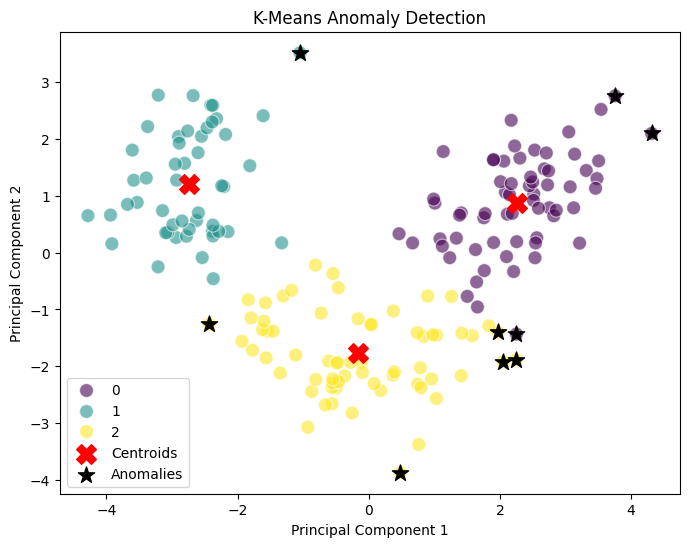

Detected Anomalies (Indices in Dataset): [  3  14  63  66  69  98 115 118 158]
     Wine  Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  \
3       1     14.37      1.95      2.50      16.8       113      3.85   
14      1     14.38      1.87      2.38      12.0       102      3.30   
63      2     12.37      1.13      2.16      19.0        87      3.50   
66      2     13.11      1.01      1.70      15.0        78      2.98   
69      2     12.21      1.19      1.75      16.8       151      1.85   
98      2     12.37      1.07      2.10      18.5        88      3.52   
115     2     11.03      1.51      2.20      21.5        85      2.46   
118     2     12.77      3.43      1.98      16.0        80      1.63   
158     3     14.34      1.68      2.70      25.0        98      2.80   

     Feature7  Feature8  Feature9  Feature10  Feature11  Feature12  Feature13  
3        3.49      0.24      2.18       7.80       0.86       3.45       1480  
14       3.64      0.29      2

In [53]:
#task 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the dataset

df = pd.read_csv('Wine.csv', header=None)

column_names = ["Wine", "Feature1", "Feature2", "Feature3", "Feature4", "Feature5",
                "Feature6", "Feature7", "Feature8", "Feature9", "Feature10",
                "Feature11", "Feature12", "Feature13"]

df.columns = column_names  # Assign new column names


# Step 2: Preprocess the data
X = df.drop(columns=["Wine"])  # Assuming "Wine" is the target column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply K-means Clustering
k = 3  # Fixed number of clusters
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Compute distance of each point from its cluster centroid
distances = np.linalg.norm(X_pca - kmeans.cluster_centers_[clusters], axis=1)

# Step 4: Detect anomalies (top 5% most distant points)
threshold = np.percentile(distances, 95)
anomalies = X_pca[distances > threshold]

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=100, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200, label="Centroids")
plt.scatter(anomalies[:, 0], anomalies[:, 1], c="black", marker="*", s=150, label="Anomalies")
plt.title("K-Means Anomaly Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Step 5: Print detected anomalies
anomaly_indices = np.where(distances > threshold)[0]
print("Detected Anomalies (Indices in Dataset):", anomaly_indices)
print(df.iloc[anomaly_indices])  # Display original rows of detected anomalies
